In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.5 * np.random.randn(100)

In [6]:
import pandas as pd

In [8]:
df = pd.DataFrame()

In [10]:
df['X'] = X.reshape(100)
df['y'] = y

In [12]:
df

,X,y
0,-0.125460,0.090744
1,0.450714,0.459926
2,0.231994,0.207344
3,0.098658,-0.964584
4,-0.343981,0.245134
...,...,...
95,-0.006204,-0.407790
96,0.022733,-0.037001
97,-0.072459,0.186327
98,-0.474581,0.814026


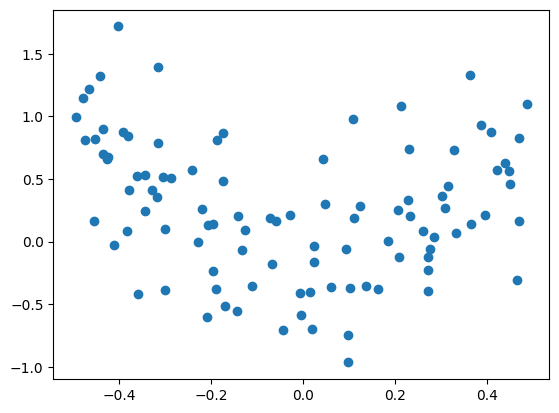

In [14]:
plt.scatter(df['X'],df['y'])
plt.show()

In [16]:
df['pred1'] = df['y'].mean()

In [18]:
df

,X,y,pred1
0,-0.125460,0.090744,0.264972
1,0.450714,0.459926,0.264972
2,0.231994,0.207344,0.264972
3,0.098658,-0.964584,0.264972
4,-0.343981,0.245134,0.264972
...,...,...,...
95,-0.006204,-0.407790,0.264972
96,0.022733,-0.037001,0.264972
97,-0.072459,0.186327,0.264972
98,-0.474581,0.814026,0.264972


In [20]:
df['residual1'] = df['y'] - df['pred1']

In [22]:
df

,X,y,pred1,residual1
0,-0.125460,0.090744,0.264972,-0.174228
1,0.450714,0.459926,0.264972,0.194954
2,0.231994,0.207344,0.264972,-0.057628
3,0.098658,-0.964584,0.264972,-1.229556
4,-0.343981,0.245134,0.264972,-0.019839
...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762
96,0.022733,-0.037001,0.264972,-0.301973
97,-0.072459,0.186327,0.264972,-0.078645
98,-0.474581,0.814026,0.264972,0.549054


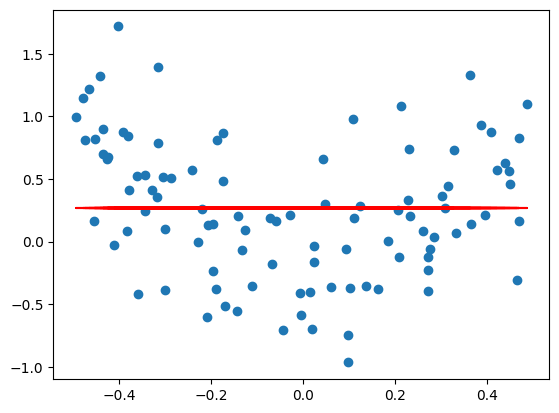

In [25]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
tree1 = DecisionTreeRegressor(max_depth=8)

In [33]:
tree1.fit(df['X'].values.reshape(100,1),df['residual1'].values)

DecisionTreeRegressor(max_depth=8)

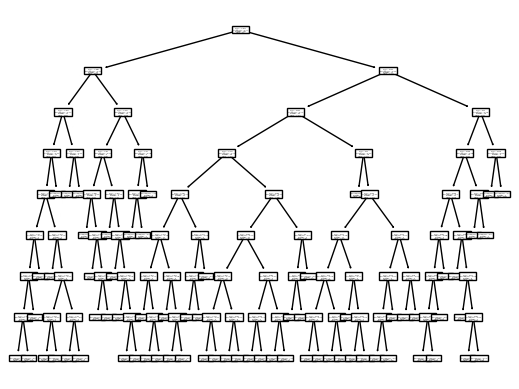

In [37]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [39]:
X_test = np.linspace(-0.5, 0.5, 500)

In [42]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

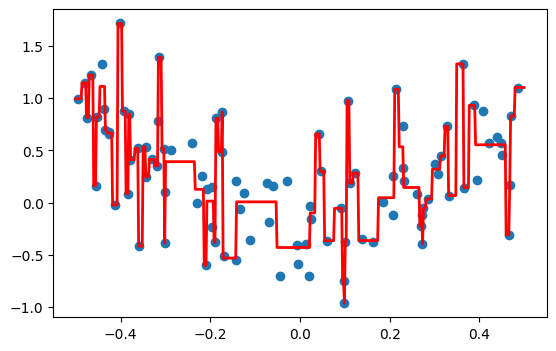

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [46]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [48]:
df

,X,y,pred1,residual1,pred2
0,-0.125460,0.090744,0.264972,-0.174228,0.006900
1,0.450714,0.459926,0.264972,0.194954,0.553693
2,0.231994,0.207344,0.264972,-0.057628,0.144824
3,0.098658,-0.964584,0.264972,-1.229556,-0.964098
4,-0.343981,0.245134,0.264972,-0.019839,0.245619
...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.430430
96,0.022733,-0.037001,0.264972,-0.301973,-0.099011
97,-0.072459,0.186327,0.264972,-0.078645,0.006900
98,-0.474581,0.814026,0.264972,0.549054,0.814512


In [50]:
df['res2'] = df['y'] - df['pred2']

In [52]:
df

,X,y,pred1,residual1,pred2,res2
0,-0.125460,0.090744,0.264972,-0.174228,0.006900,0.083844
1,0.450714,0.459926,0.264972,0.194954,0.553693,-0.093766
2,0.231994,0.207344,0.264972,-0.057628,0.144824,0.062520
3,0.098658,-0.964584,0.264972,-1.229556,-0.964098,-0.000486
4,-0.343981,0.245134,0.264972,-0.019839,0.245619,-0.000486
...,...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.430430,0.022641
96,0.022733,-0.037001,0.264972,-0.301973,-0.099011,0.062010
97,-0.072459,0.186327,0.264972,-0.078645,0.006900,0.179427
98,-0.474581,0.814026,0.264972,0.549054,0.814512,-0.000486


In [54]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [57]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [59]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

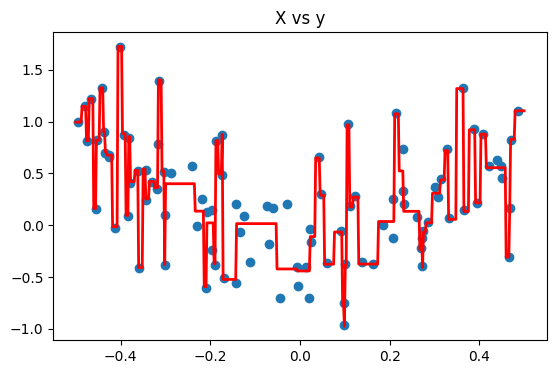

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')